In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
#import data
loan = pd.read_csv("loan.csv")

## Data Exploration

In [5]:
loan.head()

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util,application_type
0,1077501,1296599,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,13648,83.70%,INDIVIDUAL
1,1077430,1314167,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1687,9.40%,INDIVIDUAL
2,1077175,1313524,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,2956,98.50%,INDIVIDUAL
3,1076863,1277178,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,5598,21%,INDIVIDUAL
4,1075358,1311748,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,27783,53.90%,INDIVIDUAL


In [6]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util,application_type
39712,92187,92174,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,7274,13.10%,INDIVIDUAL
39713,90665,90607,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,8847,26.90%,INDIVIDUAL
39714,90395,90390,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,9698,19.40%,INDIVIDUAL
39715,90376,89243,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,85607,0.70%,INDIVIDUAL
39716,87023,86999,7500,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,debt_consolidation,Consolidation Loan,4175,51.50%,INDIVIDUAL


In [7]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'revol_bal', 'revol_util',
       'application_type'],
      dtype='object')

In [8]:
loan.shape

(39717, 21)

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt_inv      39717 non-null  float64
 4   term                 39717 non-null  object 
 5   int_rate             39717 non-null  object 
 6   installment          39717 non-null  float64
 7   grade                39557 non-null  object 
 8   sub_grade            39717 non-null  object 
 9   emp_title            37258 non-null  object 
 10  emp_length           38642 non-null  object 
 11  home_ownership       39717 non-null  object 
 12  annual_inc           39717 non-null  float64
 13  verification_status  39717 non-null  object 
 14  issue_d              39717 non-null  object 
 15  loan_status          39717 non-null 

In [10]:
# The percentage of null values

round((loan.isnull().sum()/loan.shape[0])*100,2)

id                     0.00
member_id              0.00
loan_amnt              0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.40
sub_grade              0.00
emp_title              6.19
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
title                  0.03
revol_bal              0.00
revol_util             0.13
application_type       0.00
dtype: float64

In [11]:
# The percentage of null values row-wise

round((loan.isnull().sum(axis=1)/loan.shape[0])*100,2)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Length: 39717, dtype: float64

In [12]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt_inv,installment,annual_inc,revol_bal
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10397.448868,324.561922,6.896893e+04,13382.528086
std,2.106941e+05,2.656783e+05,7456.670694,7128.450439,208.874874,6.379377e+04,15885.016641
min,5.473400e+04,7.069900e+04,500.000000,0.000000,15.690000,4.000000e+03,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5000.000000,167.020000,4.040400e+04,3703.000000
50%,6.656650e+05,8.508120e+05,10000.000000,8975.000000,280.220000,5.900000e+04,8850.000000
75%,8.377550e+05,1.047339e+06,15000.000000,14400.000000,430.780000,8.230000e+04,17058.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,1305.190000,6.000000e+06,149588.000000


In [13]:
#lable based filter

loan_attribute_df = loan.loc[100:200,['loan_amnt','term','int_rate','loan_status']]

In [14]:
loan_attribute_df

,loan_amnt,term,int_rate,loan_status
100,6200,36 months,9.91%,Charged Off
101,16000,60 months,17.58%,Current
102,6000,36 months,8.90%,Fully Paid
103,7200,36 months,9.91%,Fully Paid
104,9500,36 months,8.90%,Fully Paid
...,...,...,...,...
196,25000,36 months,11.71%,Fully Paid
197,9000,36 months,12.69%,Fully Paid
198,13250,36 months,10.65%,Fully Paid
199,20000,36 months,13.49%,Fully Paid


In [15]:
loan_attribute_df.isnull().sum()

loan_amnt      0
term           0
int_rate       0
loan_status    0
dtype: int64

In [16]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'revol_bal', 'revol_util',
       'application_type'],
      dtype='object')

In [17]:
loan.iloc[100:200,10:15]

,emp_length,home_ownership,annual_inc,verification_status,issue_d
100,2 years,RENT,25000.0,Not Verified,Dec-11
101,7 years,RENT,65000.0,Not Verified,Dec-11
102,8 years,OWN,28800.0,Not Verified,Dec-11
103,6 years,RENT,135000.0,Not Verified,Dec-11
104,7 years,MORTGAGE,50000.0,Not Verified,Dec-11
...,...,...,...,...,...
195,8 years,MORTGAGE,70000.0,Not Verified,Dec-11
196,10+ years,MORTGAGE,100000.0,Verified,Dec-11
197,5 years,RENT,50000.0,Source Verified,Dec-11
198,4 years,RENT,35000.0,Not Verified,Dec-11


In [18]:
loan['loan_amnt']

0         5000
1         2500
2         2400
3        10000
4         3000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 39717, dtype: int64

In [19]:
loan['loan_amnt'].min()

500

In [20]:
loan['loan_amnt'].max()

35000

In [21]:
loan['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [22]:
loan.nsmallest(10,'loan_amnt')

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util,application_type
38863,312505,312443,500,450.0,36 months,9.76%,16.08,B,B2,"Hughes, Hubbard & Reed LLP",7 years,MORTGAGE,59000.00,Not Verified,Mar-08,Fully Paid,other,Store Charge Card,65414,47.80%,INDIVIDUAL
39275,242695,242682,500,500.0,36 months,10.71%,16.31,B,B5,NaN,< 1 year,MORTGAGE,7904.04,Not Verified,Jan-08,Fully Paid,vacation,go on vacation in 08,44,3.70%,INDIVIDUAL
39373,216698,174214,500,500.0,36 months,10.46%,16.25,B,B5,THe University of Illinois,3 years,MORTGAGE,26000.00,Not Verified,Jan-08,Fully Paid,small_business,Financing for business,5643,60.70%,INDIVIDUAL
39397,211133,210644,500,475.0,36 months,11.41%,16.47,C,C3,Global Travel International -and- Global Domai...,< 1 year,RENT,19500.00,Not Verified,Jan-08,Fully Paid,other,A's2Zee's,12229,90.60%,INDIVIDUAL
39544,164346,163835,500,400.0,36 months,8.07%,15.69,A,A4,NaN,< 1 year,RENT,18000.00,Not Verified,Nov-07,Fully Paid,other,buying a new computer,0,0%,INDIVIDUAL
38899,306018,305720,700,700.0,36 months,12.29%,23.35,C,C5,SDSU Residential Life,< 1 year,RENT,19000.00,Not Verified,Mar-08,Fully Paid,debt_consolidation,Need help to get out of debt,0,NaN,INDIVIDUAL
38867,311591,311571,725,650.0,36 months,7.37%,22.51,A,A1,"Team Awesome Productions, Inc.",1 year,RENT,12000.00,Not Verified,Mar-08,Fully Paid,credit_card,MasterCard Liberation Front,1814,7%,INDIVIDUAL
39211,253227,253223,750,725.0,36 months,12.29%,25.02,C,C5,Whole Foods Market,< 1 year,RENT,19000.00,Not Verified,Feb-08,Fully Paid,credit_card,Paying down credit card debt,12220,84.90%,INDIVIDUAL
39262,244029,244014,800,800.0,36 months,7.37%,24.84,A,A1,Retif,2 years,MORTGAGE,35000.00,Not Verified,Jan-08,Fully Paid,debt_consolidation,Consolidate small debts,19901,29.80%,INDIVIDUAL
39143,262961,262933,900,875.0,36 months,8.63%,28.47,A,A5,Network One,4 years,OWN,57000.00,Not Verified,Feb-08,Fully Paid,home_improvement,New Heat Pump,167,3.30%,INDIVIDUAL


In [23]:
loan.nlargest(10,'loan_amnt')

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util,application_type
80,1068994,1303432,35000,22050.00000,60 months,17.27%,551.84,NaN,D3,tutor Per ini Corporation,3 years,MORTGAGE,150000.0,Verified,Dec-11,Fully Paid,home_improvement,Home improvement,7334,53.30%,INDIVIDUAL
128,1068159,1302729,35000,35000.00000,36 months,8.90%,1111.37,NaN,A5,City of Los Angeles,6 years,MORTGAGE,125000.0,Verified,Dec-11,Fully Paid,debt_consolidation,Debt Consolidation,9051,34.80%,INDIVIDUAL
185,1067084,1301459,35000,35000.00000,36 months,10.65%,1140.07,NaN,B2,baylor college of medicine,2 years,MORTGAGE,168000.0,Verified,Dec-11,Fully Paid,debt_consolidation,pertsonal loan,1099,1.40%,INDIVIDUAL
268,1066155,1277661,35000,26800.00000,60 months,18.64%,690.56,E,E1,"Navistar, Inc.",8 years,MORTGAGE,85000.0,Verified,Dec-11,Fully Paid,debt_consolidation,Debt Consolidation,31071,53%,INDIVIDUAL
276,1065896,1300036,35000,35000.00000,36 months,8.90%,1111.37,A,A5,Twitch LLC,5 years,RENT,85000.0,Verified,Dec-11,Fully Paid,debt_consolidation,debt consolidation..,16720,61.50%,INDIVIDUAL
306,1061681,1293700,35000,23200.00000,60 months,20.30%,619.88,E,E5,Prospect Transportation Inc.,5 years,RENT,85000.0,Verified,Dec-11,Fully Paid,debt_consolidation,Credit Cards Payoff,31306,74.50%,INDIVIDUAL
336,1065110,1299187,35000,21739.74813,60 months,17.27%,578.71,D,D3,Fed Govt-Environmental Protection Agency,8 years,MORTGAGE,208000.0,Source Verified,Dec-11,Fully Paid,debt_consolidation,Debt Consolidation,3761,23.50%,INDIVIDUAL
387,1053765,1285367,35000,26043.43249,60 months,12.42%,619.26,B,B4,United States Air Force,9 years,MORTGAGE,105000.0,Verified,Dec-11,Fully Paid,home_improvement,Home Improvement Loan,15523,25%,INDIVIDUAL
431,1057239,1288798,35000,32763.05520,60 months,19.42%,916.03,E,E3,"Skanska USA Civil West, Inc",8 years,RENT,195000.0,Verified,Dec-11,Current,debt_consolidation,Debt Consolidation Loan,29573,66.10%,INDIVIDUAL
496,1063393,1295948,35000,23225.00000,60 months,20.30%,619.88,E,E5,The Crexent Business Centers,3 years,OWN,85000.0,Verified,Dec-11,Charged Off,debt_consolidation,FREEDOM debt,18515,76.50%,INDIVIDUAL


In [24]:
loan.sort_values(by='annual_inc',ascending=False)

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util,application_type
30107,513542,663575,5000,5000.000000,36 months,12.73%,167.84,C,C1,post office,10+ years,MORTGAGE,6000000.0,Source Verified,May-10,Fully Paid,home_improvement,home improvment,1434,37.70%,INDIVIDUAL
29639,519954,672152,25000,11430.000820,60 months,10.62%,334.08,B,B3,Lea Regional Hospital/Pecos Valley,3 years,MORTGAGE,3900000.0,Not Verified,Jun-10,Fully Paid,home_improvement,Home improvement loan,3270,10.20%,INDIVIDUAL
39089,269818,267741,8450,3747.000000,36 months,12.29%,281.84,C,C5,at&t wireless,< 1 year,RENT,2039784.0,Not Verified,Mar-08,Fully Paid,debt_consolidation,Consolidation,8747,51.80%,INDIVIDUAL
23551,611872,784585,1500,1500.000000,36 months,6.17%,45.75,A,A3,Montgomery ISD,5 years,MORTGAGE,1900000.0,Source Verified,Nov-10,Fully Paid,credit_card,Credit Card Refinancing,17396,59.60%,INDIVIDUAL
7247,884755,1100269,12025,12000.000000,36 months,14.27%,412.57,C,C2,NYCDOE,10+ years,RENT,1782000.0,Not Verified,Sep-11,Fully Paid,debt_consolidation,LC2,49208,85.70%,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29567,520804,673328,2000,2000.000000,60 months,10.62%,43.11,B,B3,NaN,NaN,OWN,4800.0,Not Verified,May-10,Fully Paid,car,Car,1646,82.30%,INDIVIDUAL
37709,367694,381474,2750,2709.036252,36 months,16.95%,97.98,E,E5,Clark University,3 years,RENT,4200.0,Not Verified,Jan-09,Fully Paid,educational,Paying for my last semester of college,0,NaN,INDIVIDUAL
30726,503299,647711,1200,1200.000000,36 months,12.73%,40.28,C,C1,NaN,NaN,RENT,4200.0,Not Verified,Apr-10,Fully Paid,educational,Investment in Education.,63,7.90%,INDIVIDUAL
29283,524201,678265,1400,1400.000000,36 months,11.86%,46.41,B,B5,ihss,< 1 year,RENT,4080.0,Not Verified,Jun-10,Charged Off,debt_consolidation,roses loan,1500,22.10%,INDIVIDUAL


## Data Cleaning

In [25]:
#remove unnecessary_columns

unnecessary_columns = ['id','member_id'] 
loan.drop(unnecessary_columns,axis=1,inplace=True)

In [26]:
loan.isnull().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                   160
sub_grade                 0
emp_title              2459
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
title                    11
revol_bal                 0
revol_util               50
application_type          0
dtype: int64

In [27]:
# Removing all NA values are very less as compared to the dataset.

loan_1 = loan.dropna(axis=0, how = 'any').copy()
loan_1.isnull().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
title                  0
revol_bal              0
revol_util             0
application_type       0
dtype: int64

In [28]:
loan_1

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util,application_type
1,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1687,9.40%,INDIVIDUAL
3,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,5598,21%,INDIVIDUAL
4,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,27783,53.90%,INDIVIDUAL
5,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,7963,28.30%,INDIVIDUAL
6,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,17726,85.60%,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39710,5000,250.0,36 months,7.43%,155.38,A,A2,Rush Univ Med Grp,1 year,OWN,85000.0,Not Verified,Jul-07,Fully Paid,credit_card,My Credit Card Loan,216,0.60%,INDIVIDUAL
39711,5000,700.0,36 months,8.70%,158.30,B,B1,"A. F. Wolfers, Inc.",5 years,MORTGAGE,75000.0,Not Verified,Jul-07,Fully Paid,credit_card,Reduce Credit Card Debt,66033,23%,INDIVIDUAL
39712,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,7274,13.10%,INDIVIDUAL
39713,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,8847,26.90%,INDIVIDUAL


In [29]:
loan_1['int_rate'] = loan_1['int_rate'].astype('string')

In [30]:
loan_1['int_rate'] = loan_1['int_rate'].apply(lambda x: x.split('%')[0])

In [32]:
loan_1['int_rate'] = loan_1['int_rate'].astype('float')

In [33]:
loan_1['int_rate']

1        15.27
3        13.49
4        12.69
5         7.90
6        15.96
         ...  
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39716    13.75
Name: int_rate, Length: 36992, dtype: float64

In [34]:
#0-8: low int rate
#8.1-13: medium int rate
#>13: hih int rate
def int_rate_binning(x):
    if x<8:
        return 'low'
    elif x>8 and x<=13:
        return 'medium'
    else:
        return 'high'
    
loan_1['int_rate_category']= loan_1['int_rate'].apply(lambda x: int_rate_binning(x))

In [35]:
loan_1['int_rate_category']

1          high
3          high
4        medium
5           low
6          high
          ...  
39710       low
39711    medium
39712    medium
39713    medium
39716      high
Name: int_rate_category, Length: 36992, dtype: object

In [36]:
loan_1['annual_inc']

1         30000.0
3         49200.0
4         80000.0
5         36000.0
6         47004.0
           ...   
39710     85000.0
39711     75000.0
39712    110000.0
39713     18000.0
39716     22000.0
Name: annual_inc, Length: 36992, dtype: float64

In [37]:
#low-income: 0-50000
#medium-income : 50001-100000
#high-income:100001>
def annual_inc_binning(x):
  if x<=50000:
    return 'low income'
  elif x>50000 and x<=100000:
    return 'medium income'
  else:
    return 'high income'


In [38]:
loan_1['annual_inc_category'] = loan_1['annual_inc'].apply(lambda x: annual_inc_binning(x))

In [39]:
loan_1['annual_inc_category']

1           low income
3           low income
4        medium income
5           low income
6           low income
             ...      
39710    medium income
39711    medium income
39712      high income
39713       low income
39716       low income
Name: annual_inc_category, Length: 36992, dtype: object

In [40]:
loan_1

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util,application_type,int_rate_category,annual_inc_category
1,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1687,9.40%,INDIVIDUAL,high,low income
3,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,5598,21%,INDIVIDUAL,high,low income
4,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,27783,53.90%,INDIVIDUAL,medium,medium income
5,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,7963,28.30%,INDIVIDUAL,low,low income
6,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,17726,85.60%,INDIVIDUAL,high,low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39710,5000,250.0,36 months,7.43,155.38,A,A2,Rush Univ Med Grp,1 year,OWN,85000.0,Not Verified,Jul-07,Fully Paid,credit_card,My Credit Card Loan,216,0.60%,INDIVIDUAL,low,medium income
39711,5000,700.0,36 months,8.70,158.30,B,B1,"A. F. Wolfers, Inc.",5 years,MORTGAGE,75000.0,Not Verified,Jul-07,Fully Paid,credit_card,Reduce Credit Card Debt,66033,23%,INDIVIDUAL,medium,medium income
39712,2500,1075.0,36 months,8.07,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,7274,13.10%,INDIVIDUAL,medium,high income
39713,8500,875.0,36 months,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,8847,26.90%,INDIVIDUAL,medium,low income


In [41]:
loan_1['issue_d']

1        Dec-11
3        Dec-11
4        Dec-11
5        Dec-11
6        Dec-11
          ...  
39710    Jul-07
39711    Jul-07
39712    Jul-07
39713    Jul-07
39716    Jun-07
Name: issue_d, Length: 36992, dtype: object

In [42]:
#loan_1['issue_d']--> month ,year -2011

In [43]:
loan_1['month']=loan_1['issue_d'].apply(lambda x: x.split('-')[0])
loan_1['year']=loan_1['issue_d'].apply(lambda x: '20'+ x.split('-')[1])

In [44]:
loan_1['year']

1        2011
3        2011
4        2011
5        2011
6        2011
         ... 
39710    2007
39711    2007
39712    2007
39713    2007
39716    2007
Name: year, Length: 36992, dtype: object

In [45]:
loan_1['month']

1        Dec
3        Dec
4        Dec
5        Dec
6        Dec
        ... 
39710    Jul
39711    Jul
39712    Jul
39713    Jul
39716    Jun
Name: month, Length: 36992, dtype: object

In [46]:
'''10+ ->11
remove special chac or years
0-5--> begineer
6-10--> intermediate
10+--> expert'''

'10+ ->11\nremove special chac or years\n0-5--> begineer\n6-10--> intermediate\n10+--> expert'

In [47]:
import re
loan_1['Emp_Level']=loan_1['emp_length'].apply(lambda x: str(x).split(" y")[0])
loan_1['Emp_Level1']=loan_1['Emp_Level'].apply(lambda x: re.split(r'< |> ',x)[0])

In [48]:
loan_1['Emp_Level']

1        < 1
3        10+
4          1
5          3
6          8
        ... 
39710      1
39711      5
39712      4
39713      3
39716    < 1
Name: Emp_Level, Length: 36992, dtype: object

In [49]:
loan_1['Emp_Level1']

1           
3        10+
4          1
5          3
6          8
        ... 
39710      1
39711      5
39712      4
39713      3
39716       
Name: Emp_Level1, Length: 36992, dtype: object

In [50]:
def l(x):
    if x=="10+ years":
        return "11"
    
    if x<'5':
        return "Beginner"
    elif x>'5' and x<'11':
        return "Intermediate"
    else:
        return "Expert"

In [51]:
loan_1['Emp_Level1'] =loan_1['Emp_Level1'].apply(lambda x: l(x) )

In [52]:
loan_1

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,revol_bal,revol_util,application_type,int_rate_category,annual_inc_category,month,year,Emp_Level,Emp_Level1
1,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1687,9.40%,INDIVIDUAL,high,low income,Dec,2011,< 1,Beginner
3,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,5598,21%,INDIVIDUAL,high,low income,Dec,2011,10+,Beginner
4,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,27783,53.90%,INDIVIDUAL,medium,medium income,Dec,2011,1,Beginner
5,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,7963,28.30%,INDIVIDUAL,low,low income,Dec,2011,3,Beginner
6,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,17726,85.60%,INDIVIDUAL,high,low income,Dec,2011,8,Expert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39710,5000,250.0,36 months,7.43,155.38,A,A2,Rush Univ Med Grp,1 year,OWN,85000.0,Not Verified,Jul-07,Fully Paid,credit_card,My Credit Card Loan,216,0.60%,INDIVIDUAL,low,medium income,Jul,2007,1,Beginner
39711,5000,700.0,36 months,8.70,158.30,B,B1,"A. F. Wolfers, Inc.",5 years,MORTGAGE,75000.0,Not Verified,Jul-07,Fully Paid,credit_card,Reduce Credit Card Debt,66033,23%,INDIVIDUAL,medium,medium income,Jul,2007,5,Expert
39712,2500,1075.0,36 months,8.07,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,7274,13.10%,INDIVIDUAL,medium,high income,Jul,2007,4,Beginner
39713,8500,875.0,36 months,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,8847,26.90%,INDIVIDUAL,medium,low income,Jul,2007,3,Beginner


In [54]:
loan_1['int_rate']

1        15.27
3        13.49
4        12.69
5         7.90
6        15.96
         ...  
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39716    13.75
Name: int_rate, Length: 36992, dtype: float64

In [55]:
def int_rate_binning(x):
    if x<=8.0:
        return 'low_interest'
    elif x>8.0 and x <= 13.0:
        return 'medium_interest'
    else:
        return 'high_interest'

In [57]:
loan_1['int_rate_category'] = loan_1['int_rate'].apply(lambda x : int_rate_binning(x))

In [58]:
loan_1.loc[:,['int_rate','int_rate_category']]

,int_rate,int_rate_category
1,15.27,high_interest
3,13.49,high_interest
4,12.69,medium_interest
5,7.90,low_interest
6,15.96,high_interest
...,...,...
39710,7.43,low_interest
39711,8.70,medium_interest
39712,8.07,medium_interest
39713,10.28,medium_interest


#Data Analysis

In [59]:
#uni-variate Analysis for continuous variable
def uni_continuous_analys(x):
  print(loan_1[str(x)].describe())


In [60]:
uni_continuous_analys('int_rate')

count    36992.000000
mean        12.048712
std          3.715651
min          5.420000
25%          9.320000
50%         11.860000
75%         14.590000
max         24.400000
Name: int_rate, dtype: float64


In [61]:
def uni_cateforical_anals(x):
  print(loan_1[str(x)].value_counts())

In [62]:
uni_cateforical_anals('loan_status')

Fully Paid     30845
Charged Off     5085
Current         1062
Name: loan_status, dtype: int64


In [63]:
uni_cateforical_anals('int_rate_category')


medium_interest    15074
high_interest      14359
low_interest        7559
Name: int_rate_category, dtype: int64


In [64]:
loan_1.groupby(['loan_status','int_rate_category']).size().reset_index(name='Count')

,loan_status,int_rate_category,Count
0,Charged Off,high_interest,2921
1,Charged Off,low_interest,377
2,Charged Off,medium_interest,1787
3,Current,high_interest,677
4,Current,low_interest,13
5,Current,medium_interest,372
6,Fully Paid,high_interest,10761
7,Fully Paid,low_interest,7169
8,Fully Paid,medium_interest,12915


In [65]:
loan_1.groupby(['loan_status','Emp_Level1']).size().reset_index(name='Count')

,loan_status,Emp_Level1,Count
0,Charged Off,Beginner,3762
1,Charged Off,Expert,1323
2,Current,Beginner,785
3,Current,Expert,277
4,Fully Paid,Beginner,22787
5,Fully Paid,Expert,8058


In [66]:
loan_1.groupby(['loan_status','purpose']).size().reset_index(name='Count').sort_values(by='Count',ascending=False)

,loan_status,purpose,Count
29,Fully Paid,debt_consolidation,14563
28,Fully Paid,credit_card,4200
36,Fully Paid,other,2995
2,Charged Off,debt_consolidation,2566
31,Fully Paid,home_improvement,2351
33,Fully Paid,major_purchase,1796
27,Fully Paid,car,1256
38,Fully Paid,small_business,1024
40,Fully Paid,wedding,797
9,Charged Off,other,565


In [67]:
import numpy as np
loan_1.groupby(['loan_status','verification_status'])['loan_amnt','annual_inc'].agg([np.median])

C:\Users\parth\AppData\Local\Temp\ipykernel_24556\1616363603.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  loan_1.groupby(['loan_status','verification_status'])['loan_amnt','annual_inc'].agg([np.median])


loan_amnt annual_inc
                                   median     median
loan_status verification_status                     
Charged Off Not Verified           8000.0    48100.0
            Source Verified        9600.0    50000.0
            Verified              16000.0    62000.0
Current     Not Verified          12000.0    53640.0
            Source Verified       13062.5    61500.0
            Verified              20000.0    72000.0
Fully Paid  Not Verified           7500.0    54000.0
            Source Verified        8500.0    56000.0
            Verified              15000.0    72000.0

In [68]:
loan_1.groupby(['loan_status','verification_status'])['loan_amnt','annual_inc'].agg([np.median])

C:\Users\parth\AppData\Local\Temp\ipykernel_24556\3843064314.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  loan_1.groupby(['loan_status','verification_status'])['loan_amnt','annual_inc'].agg([np.median])


loan_amnt annual_inc
                                   median     median
loan_status verification_status                     
Charged Off Not Verified           8000.0    48100.0
            Source Verified        9600.0    50000.0
            Verified              16000.0    62000.0
Current     Not Verified          12000.0    53640.0
            Source Verified       13062.5    61500.0
            Verified              20000.0    72000.0
Fully Paid  Not Verified           7500.0    54000.0
            Source Verified        8500.0    56000.0
            Verified              15000.0    72000.0

In [69]:
loan_1.groupby(['loan_status'])['annual_inc'].agg([np.mean])

,mean
loan_status,
Charged Off,63046.419998
Current,76195.404765
Fully Paid,70107.120027


In [70]:
loan_1.groupby(['loan_status'])['int_rate'].agg([np.median])

,median
loan_status,
Charged Off,13.61
Current,14.65
Fully Paid,11.49


# Data Visualization

In [71]:
import seaborn as sns

<AxesSubplot:xlabel='loan_status', ylabel='count'>

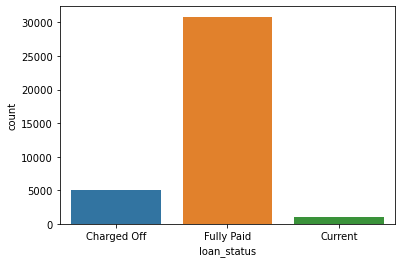

In [72]:
#categorical data visualization: countplot
sns.countplot(x=loan_1["loan_status"])

<AxesSubplot:xlabel='int_rate_category', ylabel='count'>

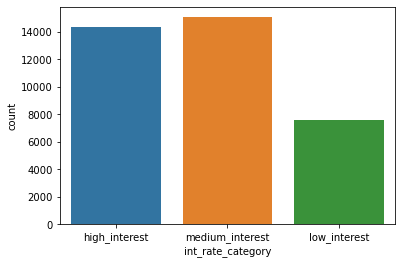

In [73]:
sns.countplot(x=loan_1["int_rate_category"])

<AxesSubplot:xlabel='annual_inc_category', ylabel='count'>

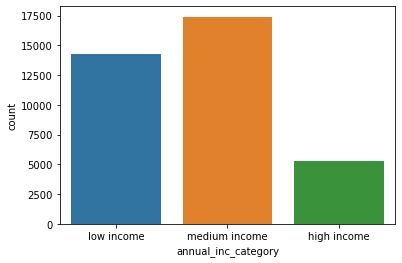

In [74]:
sns.countplot(x=loan_1["annual_inc_category"])

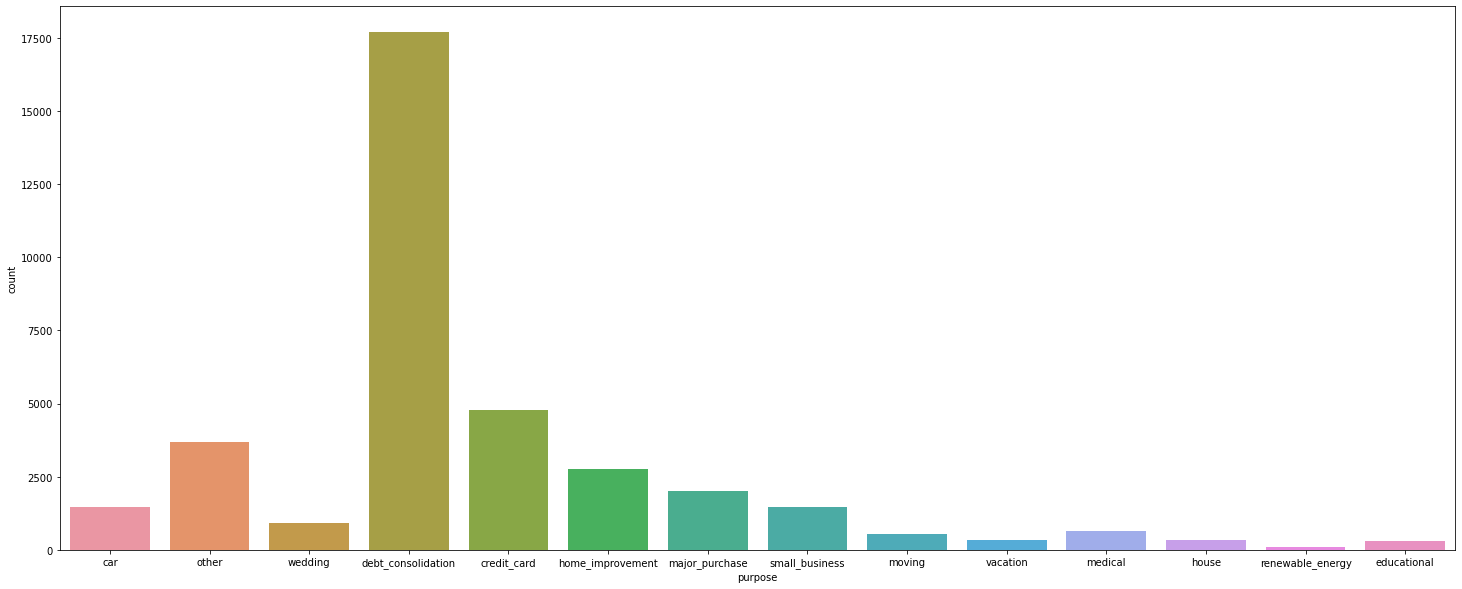

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
sns.countplot(x=loan_1["purpose"])
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='count'>

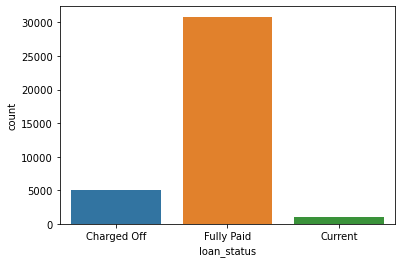

In [76]:
#import matplotlib.pyplot as plt

sns.countplot(x=loan_1["loan_status"])


C:\Users\parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_rate', ylabel='Density'>

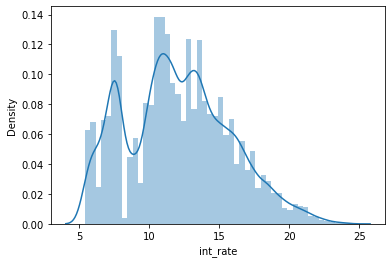

In [77]:
#uni-variate analysis for continuous variable
sns.distplot(loan_1['int_rate'])

C:\Users\parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

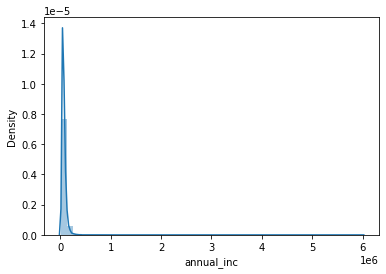

In [78]:
sns.distplot(loan_1['annual_inc'])

In [79]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2959 sha256=7141c3dba4b004c7f8009f9dd768a30ce2a88a6a6e20b94018d648fb2a43ecce
  Stored in directory: c:\users\parth\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X, y = make_classification(random_state=20)

In [81]:
len(y)

100

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.80)

In [83]:
len(y_train)

80

In [84]:
len(y_test)

20

In [85]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.80,random_state=30)



In [86]:
X_train

array([[6.9, 3.1, 5.4, 2.1],
       [5.5, 2.4, 3.7, 1. ],
       [6.8, 3. , 5.5, 2.1],
       [6.1, 3. , 4.9, 1.8],
       [7.7, 2.6, 6.9, 2.3],
       [6.9, 3.1, 5.1, 2.3],
       [5.1, 2.5, 3. , 1.1],
       [6.4, 3.1, 5.5, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [7.2, 3. , 5.8, 1.6],
       [6.8, 3.2, 5.9, 2.3],
       [6.4, 2.8, 5.6, 2.1],
       [5.8, 4. , 1.2, 0.2],
       [6.2, 2.2, 4.5, 1.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.2, 2.7, 3.9, 1.4],
       [5.6, 2.7, 4.2, 1.3],
       [6.1, 2.8, 4.7, 1.2],
       [5.5, 2.5, 4. , 1.3],
       [5.6, 3. , 4.1, 1.3],
       [4.6, 3.4, 1.4, 0.3],
       [5.8, 2.7, 4.1, 1. ],
       [6.7, 3.3, 5.7, 2.5],
       [5.8, 2.6, 4. , 1.2],
       [5.1, 3.7, 1.5, 0.4],
       [6. , 2.7, 5.1, 1.6],
       [4.8, 3. , 1.4, 0.1],
       [5.6, 3. , 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.1, 2.9, 4.7, 1.4],
       [4.7, 3.2, 1.6, 0.2],
       [5.4, 3. , 4.5, 1.5],
       [5.1, 3.3, 1.7, 0.5],
       [5.7, 2.9, 4.2, 1.3],
       [5.4, 3

In [87]:
X_train

array([[6.9, 3.1, 5.4, 2.1],
       [5.5, 2.4, 3.7, 1. ],
       [6.8, 3. , 5.5, 2.1],
       [6.1, 3. , 4.9, 1.8],
       [7.7, 2.6, 6.9, 2.3],
       [6.9, 3.1, 5.1, 2.3],
       [5.1, 2.5, 3. , 1.1],
       [6.4, 3.1, 5.5, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [7.2, 3. , 5.8, 1.6],
       [6.8, 3.2, 5.9, 2.3],
       [6.4, 2.8, 5.6, 2.1],
       [5.8, 4. , 1.2, 0.2],
       [6.2, 2.2, 4.5, 1.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.2, 2.7, 3.9, 1.4],
       [5.6, 2.7, 4.2, 1.3],
       [6.1, 2.8, 4.7, 1.2],
       [5.5, 2.5, 4. , 1.3],
       [5.6, 3. , 4.1, 1.3],
       [4.6, 3.4, 1.4, 0.3],
       [5.8, 2.7, 4.1, 1. ],
       [6.7, 3.3, 5.7, 2.5],
       [5.8, 2.6, 4. , 1.2],
       [5.1, 3.7, 1.5, 0.4],
       [6. , 2.7, 5.1, 1.6],
       [4.8, 3. , 1.4, 0.1],
       [5.6, 3. , 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.1, 2.9, 4.7, 1.4],
       [4.7, 3.2, 1.6, 0.2],
       [5.4, 3. , 4.5, 1.5],
       [5.1, 3.3, 1.7, 0.5],
       [5.7, 2.9, 4.2, 1.3],
       [5.4, 3

In [88]:
clf = LogisticRegression(random_state=23).fit(X_train, y_train)

clf.predict_proba(X[:2, :])
clf.score(X, y)

C:\Users\parth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.98